In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
import seaborn as sns

data = sns.load_dataset("iris")

In [3]:
data.head(5)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [4]:
X = data.iloc[:, :-1]
y = data.iloc[:, -1]

In [5]:
# from sklearn.preprocessing import OneHotEncoder

# encoder = OneHotEncoder(sparse_output=False)
# y_encoded = encoder.fit_transform(data[['species']])

**For a typical classification task, it's better NOT to one-hot encode the target (species), since classifiers like DecisionTree can handle labels directly.**

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, random_state=52, test_size=0.2
)

**Since, we are trying pre-prunning technique, we use a dictionary of parameters and GridSearchCV to find the best option.**

In [8]:
# parameters
parameter = {
    "criterion": ["gini", "entropy", "log_loss"],
    "splitter": ["random", "best"],
    "max_depth": [1, 2, 3, 4, 5],
    "max_features": ["auto", "sqrt", "log2"],
}

In [9]:
from sklearn.model_selection import GridSearchCV

In [10]:
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier(max_depth=3)
cv = GridSearchCV(dtc, param_grid=parameter, cv=5, scoring="accuracy")

In [11]:
cv.fit(X_train, y_train)

d:\2025\100_Concepts_of_ML\myenv\Lib\site-packages\sklearn\model_selection\_validation.py:528: FitFailedWarning: 
150 fits failed out of a total of 450.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
150 fits failed with the following error:
Traceback (most recent call last):
  File "d:\2025\100_Concepts_of_ML\myenv\Lib\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
    ~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "d:\2025\100_Concepts_of_ML\myenv\Lib\site-packages\sklearn\base.py", line 1382, in wrapper
    estimator._validate_params()
    ~~~~~~~~~~~~~~~~~~~~~~~~~~^^
  File "d:\2025\100_Concepts_of_ML\myenv\Lib\site-packages\sklearn\base.py",

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(max_depth=3),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [1, 2, 3, 4, 5],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'splitter': ['random', 'best']},
             scoring='accuracy')

In [12]:
cv.best_params_

{'criterion': 'gini',
 'max_depth': 3,
 'max_features': 'sqrt',
 'splitter': 'best'}

In [13]:
y_pred = cv.predict(X_test)

In [14]:
from sklearn.metrics import accuracy_score

accuracy_score(y_pred, y_test)

0.8666666666666667

**Creating a DecisionTreeCalssifier with the obtained parameter**

In [15]:
dtc_ = DecisionTreeClassifier(
    criterion="gini", max_depth=3, max_features="log2", splitter="best"
)

In [16]:
dtc_.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, max_features='log2')

[Text(0.375, 0.875, 'x[3] <= 0.7\ngini = 0.665\nsamples = 120\nvalue = [43, 41, 36]'),
 Text(0.25, 0.625, 'gini = 0.0\nsamples = 43\nvalue = [43, 0, 0]'),
 Text(0.3125, 0.75, 'True  '),
 Text(0.5, 0.625, 'x[2] <= 4.85\ngini = 0.498\nsamples = 77\nvalue = [0, 41, 36]'),
 Text(0.4375, 0.75, '  False'),
 Text(0.25, 0.375, 'x[0] <= 4.95\ngini = 0.093\nsamples = 41\nvalue = [0, 39, 2]'),
 Text(0.125, 0.125, 'gini = 0.5\nsamples = 2\nvalue = [0, 1, 1]'),
 Text(0.375, 0.125, 'gini = 0.05\nsamples = 39\nvalue = [0, 38, 1]'),
 Text(0.75, 0.375, 'x[2] <= 5.05\ngini = 0.105\nsamples = 36\nvalue = [0, 2, 34]'),
 Text(0.625, 0.125, 'gini = 0.375\nsamples = 8\nvalue = [0, 2, 6]'),
 Text(0.875, 0.125, 'gini = 0.0\nsamples = 28\nvalue = [0, 0, 28]')]

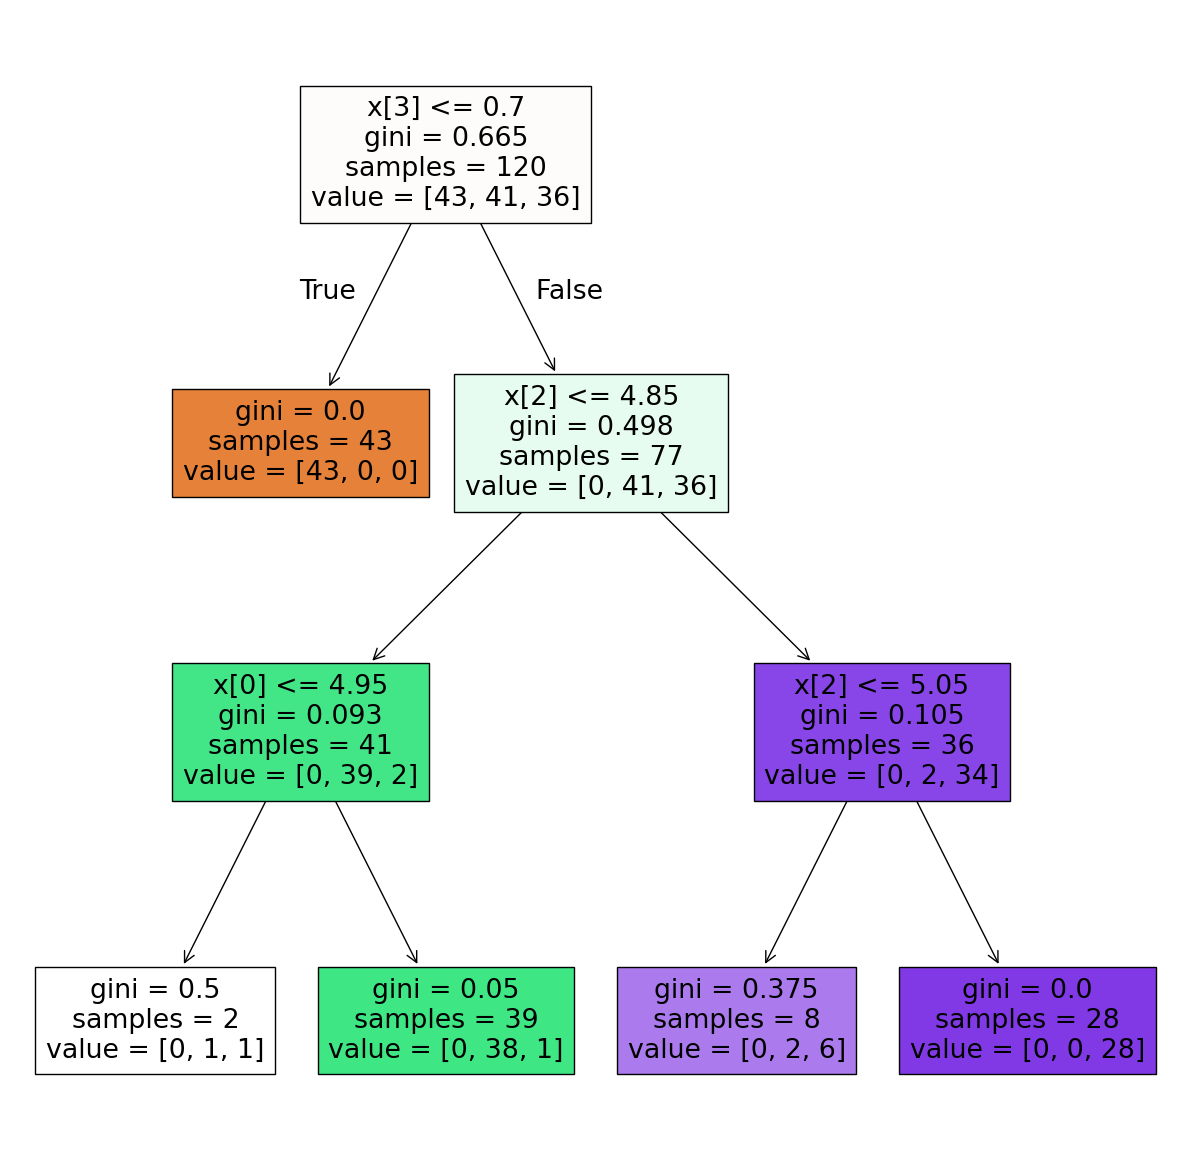

In [17]:
from sklearn import tree
plt.figure(figsize=[15,15])
tree.plot_tree(dtc_, filled=True)

In [18]:
y_pred = dtc_.predict(X_test)

In [19]:
accuracy_score(y_pred, y_test)

0.9